# Ford GoBike System "Dataset Exploration"
## by (Mina Habib)

## Preliminary Wrangling

> An Udacity Project "Communicate Data Findings" represents trips taken by members of the service for month of February of 2019.
> Content.
> Data consists of info about Bike trips taken by service's users, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.

### Table of Contents
- [Gathering Data](#gather)
- [Assessing Data](#assess)
- [Cleaning Data](#clean)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)

<a id='gather'></a>
## Gathering Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy.distance import geodesic

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Import CSV file
df = pd.read_csv('201902-fordgobike-tripdata.csv')

<a id='assess'></a>
## Assessing  Data

In [3]:
# Visually first 5 Raws
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Number of Columns & Raws
df.shape

(183412, 16)

In [5]:
# Visually check 50 random records
df.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
165149,377,2019-02-05 07:43:34.8630,2019-02-05 07:49:51.9580,370.0,Jones St at Post St,37.787327,-122.413278,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,4794,Subscriber,1987.0,Male,No
162934,358,2019-02-05 09:55:07.2290,2019-02-05 10:01:05.2570,323.0,Broadway at Kearny,37.798014,-122.405950,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4730,Subscriber,1995.0,Other,Yes
155422,477,2019-02-06 08:49:39.5830,2019-02-06 08:57:37.5040,212.0,Mosswood Park,37.824893,-122.260437,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,2871,Subscriber,1990.0,Male,No
147838,144,2019-02-07 07:10:33.6220,2019-02-07 07:12:57.7580,27.0,Beale St at Harrison St,37.788059,-122.391865,25.0,Howard St at 2nd St,37.787522,-122.397405,5416,Subscriber,1992.0,Female,No
22097,558,2019-02-26 08:30:58.3170,2019-02-26 08:40:16.4880,121.0,Mission Playground,37.759210,-122.421339,78.0,Folsom St at 9th St,37.773717,-122.411647,1538,Subscriber,1987.0,Male,No
113389,168,2019-02-12 12:26:02.7040,2019-02-12 12:28:51.1330,49.0,S Park St at 3rd St,37.780760,-122.394989,36.0,Folsom St at 3rd St,37.783830,-122.398870,6569,Subscriber,1963.0,Male,Yes
130241,162,2019-02-09 18:30:04.0950,2019-02-09 18:32:46.3810,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,47.0,4th St at Harrison St,37.780955,-122.399749,4768,Subscriber,1994.0,Male,No
13456,291,2019-02-27 16:07:11.3300,2019-02-27 16:12:02.4000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5065,Subscriber,1990.0,Male,No
125088,527,2019-02-11 07:55:53.0430,2019-02-11 08:04:40.3650,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,100.0,Bryant St at 15th St,37.767100,-122.410662,5037,Subscriber,1989.0,Male,No
146537,797,2019-02-07 08:35:08.5280,2019-02-07 08:48:26.3890,58.0,Market St at 10th St,37.776619,-122.417385,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,5422,Subscriber,1980.0,Female,No


In [6]:
# View DataFrame INFOs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# Checking Uniqueness of the Data
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [8]:
# DataFrame Description Ratios
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
# Looking For NaN Values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
# Checking duplicity
df.duplicated().sum()

0

In [11]:
# Checking Data Type
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

<a id='clean'></a>
## Cleaning & Organizing Data

In [12]:
# Removing NaN Values & Checking For the Result
df = df[df['start_station_id'].isnull() == False]
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [13]:
# Creating a New Column For Knowing the Distance for each GoBike Trip
# get this Idea from https://gis.stackexchange.com/questions/273304/how-to-measure-distance-between-2-gps-points-in-pandas 
# & https://stackoverflow.com/questions/62858552/why-cant-i-import-geopy-distance-vincenty-on-jupyter-notebook-i-installed-ge

df['dist_km'] = df.apply(
    (lambda row: geodesic(
        (row['start_station_latitude'], row['start_station_longitude']),
        (row['end_station_latitude'], row['end_station_longitude'])
    ).km),
    axis=1
)

In [14]:
# Distance Column Description Ratios
df['dist_km'].describe()

count    183215.000000
mean          1.691247
std           1.097179
min           0.000000
25%           0.909777
50%           1.431358
75%           2.227241
max          69.465977
Name: dist_km, dtype: float64

In [15]:
# Changing "start_time" & "end_time" DType to timestamps
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [16]:
# Creating a New Column to Recount Trips Durations By Hour & looking for its Description Ratios
df["duration_hour"] = df["duration_sec"]/60/60
df['duration_min']=df['duration_sec']/60
df["duration_hour"].describe()

count    183215.000000
mean          0.201639
std           0.498633
min           0.016944
25%           0.090278
50%           0.142778
75%           0.221111
max          23.734444
Name: duration_hour, dtype: float64

In [17]:
# Creating a New Column for Speed per hour & looking for its Description Ratios
df["speed_kmh"] = df["dist_km"]/df["duration_hour"]
df['speed_kmh'].describe()

count    183215.000000
mean         10.782335
std           3.942960
min           0.000000
25%           8.666464
50%          11.040548
75%          13.333053
max          36.008282
Name: speed_kmh, dtype: float64

In [18]:
# Change the DTypes of "user type", "gender" & "bike_share_for_all_trip" to Categorical Type
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')

In [19]:
# Change the DTypes of "bike id", "start_station_id", "end_station_id" to object "Strings"
df.bike_id = df.bike_id.astype(str)
df.start_station_id = df.bike_id.astype(str)
df.end_station_id = df.bike_id.astype(str)

In [20]:
# Count Values of User Type Column
df['user_type'].value_counts()

Subscriber    163414
Customer       19801
Name: user_type, dtype: int64

In [21]:
#Counting Ford GoBike Users age at the time of collecting the data & looking for its Description Ratios
df['user_age'] = 2019-df['member_birth_year']
df["user_age"].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: user_age, dtype: float64

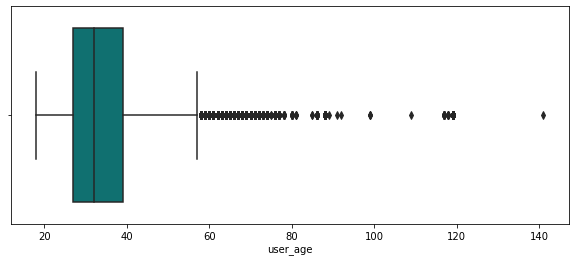

In [22]:
#Box Plot Users age
plt.figure(figsize = [10, 4])
sb.boxplot(data=df, x='user_age', color = "teal");

In [23]:
#Removing the Outlires Who Older the "60 years" & looking for its Description Ratios
df = df[df['user_age']<=60]
df["user_age"].describe()

count    171422.000000
mean         33.523387
std           8.954923
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max          60.000000
Name: user_age, dtype: float64

In [24]:
# Change "user age" and "birth year" to integers
df.user_age = df.user_age.astype(int)
df.member_birth_year = df.member_birth_year.astype(int)

In [25]:
# Extract "weekday", "hours" & "feb day num" information from the start_time
df['start_time_weekday']= df['start_time'].dt.strftime('%a')
df['start_time_hour']= df['start_time'].dt.hour
df['start_time_day']= df['start_time'].dt.day

In [26]:
# Convert the start_time_weekday to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['start_time_weekday'] = df['start_time_weekday'].astype(ordered_weekdays)

In [27]:
# Create a new field for member age group from member_age_bin
df['age_groups'] = df['user_age'].apply(lambda x: '17 - 26' if 17<x<=26
                                                  else '26 - 38' if 26<x<=38
                                                  else '38 - 50' if 38<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [28]:
# saving a New dataframe file
df.to_csv('Feb_GoBike_2019_Organised.csv') 

In [29]:
# Import CSV file to df2
df2 = pd.read_csv('Feb_GoBike_2019_Organised.csv')
print(list(df2.columns))
df2.shape

['Unnamed: 0', 'duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'dist_km', 'duration_hour', 'duration_min', 'speed_kmh', 'user_age', 'start_time_weekday', 'start_time_hour', 'start_time_day', 'age_groups']


(171422, 26)

In [30]:
df2.head(1)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,bike_share_for_all_trip,dist_km,duration_hour,duration_min,speed_kmh,user_age,start_time_weekday,start_time_hour,start_time_day,age_groups
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4902,Commercial St at Montgomery St,...,No,0.543983,14.495833,869.75,0.037527,35,Thu,17,28,26 - 38


### What is the structure of your dataset?

> There are 171422 Bikes trips in this dataset with 24 columns, and different variable types like (int - float - string - bool) but the most type are numeric.

'duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'dist_km', 'duration_hour', 'speed_kmh', 'user_age', 'start_time_weekday', 'start_time_hour', 'start_time_day', 'age_groups'

### What is/are the main feature(s) of interest in your dataset?

  * User Type
  * Member Gender   
  * users Age
  * Distance of Trips
  * Duration of Trips

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

  * WeekDays
  * Age groups of users
  * start_time
  * Speed by km/h

<a id='univariate'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

count    171422.000000
mean        703.226208
std        1654.645015
min          61.000000
25%         323.000000
50%         510.000000
75%         787.000000
max       84548.000000
Name: duration_sec, dtype: float64

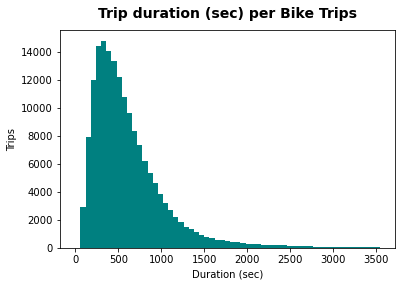

In [31]:
# Histogram For duration (sec) distribution per Bike Trips
bin_edges = np.arange(0, 3600,60)
plt.hist(data = df2, x = 'duration_sec', bins = bin_edges,  color = "teal")
plt.title("Trip duration (sec) per Bike Trips", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Duration (sec)')
plt.ylabel('Trips');
df2['duration_sec'].describe()

##### Right skewed distribution representing duration (sec)

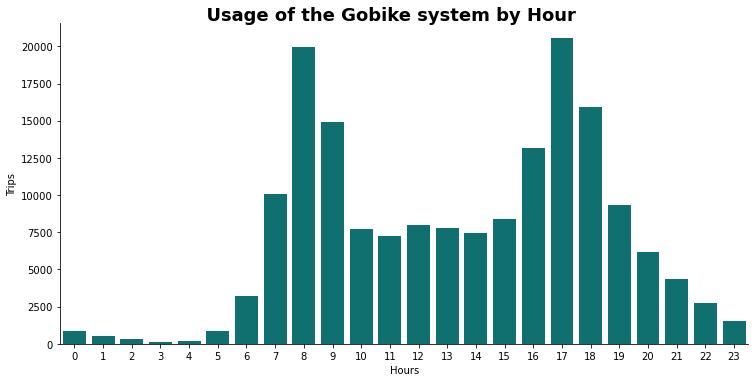

In [32]:
# Hourly Usage of the Gobike system in Febraury 2019
g = sb.catplot(data=df2, x='start_time_hour', kind='count', color = "teal", height=5.2, aspect=2)
g.set_axis_labels("Hours", "Trips")
g.fig.suptitle('  Usage of the Gobike system by Hour', y=1.015, fontsize=18, fontweight='bold');

##### Bike Rides in each Hour of Febraury Days showing that 8am & 5pm are the rush hours

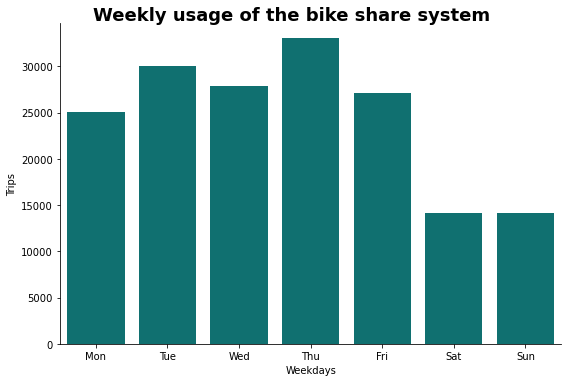

In [33]:
# Weekdays Usage of the Gobike system in Febraury 2019
g = sb.catplot(data=df2, x='start_time_weekday', kind='count', color = "teal", order = weekdays, height=5.2, aspect=1.5)
g.set_axis_labels("Weekdays", "Trips")
g.fig.suptitle('Weekly usage of the bike share system', y=1.015, fontsize=18, fontweight='bold');

##### Bike Rides in each Weekday of Febraury Days showing that Thursday and Tuesday are most crowded

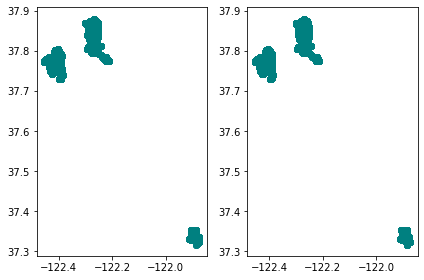

In [34]:
# plot maping Start & End Stations longitude & latitude
plt.subplot(1, 2, 1)
plt.scatter(x=df2['start_station_longitude'], y=df['start_station_latitude'], color = "teal")
plt.subplot(1, 2, 2)
plt.scatter(x=df2['end_station_longitude'], y=df['end_station_latitude'], color = "teal")
plt.tight_layout();

##### plot maping Start & End Stations longitude & latitude are typical

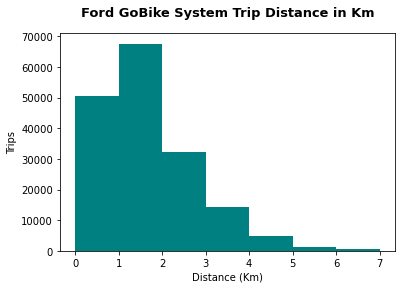

In [35]:
# Ploting Distance Per Bikes Tripes
bin_edges = np.arange(0, 8, 1)
plt.hist(data = df2, x = 'dist_km', bins = bin_edges, color = "teal");
plt.title("Ford GoBike System Trip Distance in Km", y=1.05, fontsize=13, fontweight='bold')
plt.xlabel('Distance (Km)')
plt.ylabel('Trips');

##### Most bike Trips  are less than 2 KM

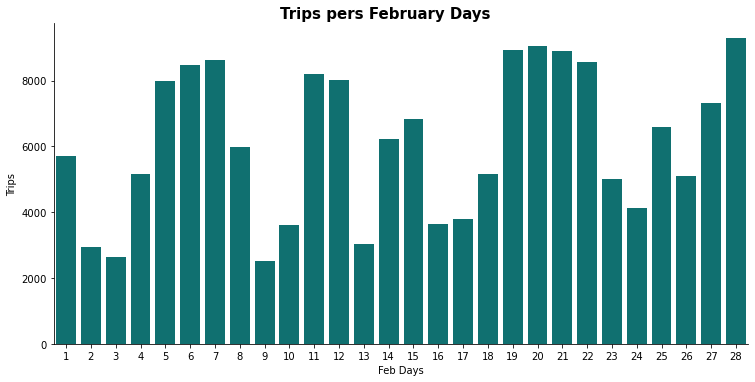

In [36]:
# Feb Days Usage of the GoBike system
g = sb.catplot(data=df2, x='start_time_day', kind='count', color = "teal", height=5.2, aspect=2)
g.set_axis_labels("Feb Days", "Trips")
g.fig.suptitle('Trips pers February Days', y=1.015, fontsize=15, fontweight='bold');

##### Trips per each day of Febraury

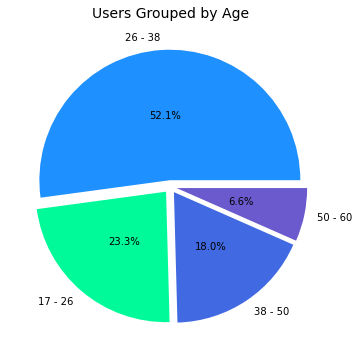

In [37]:
# Pie Ploting Users due to age groups
colors = ['dodgerblue', 'mediumspringgreen', 'royalblue' , 'slateblue']
pie, ax = plt.subplots(figsize=[10,6])
labels = df2.age_groups.value_counts().keys()
plt.pie(x=df2.age_groups.value_counts(), autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5, colors=colors)
plt.title("Users Grouped by Age", fontsize=14);

##### Age Groups By Pie Plot showing each one percentage

Subscriber    155050
Customer       16372
Name: user_type, dtype: int64

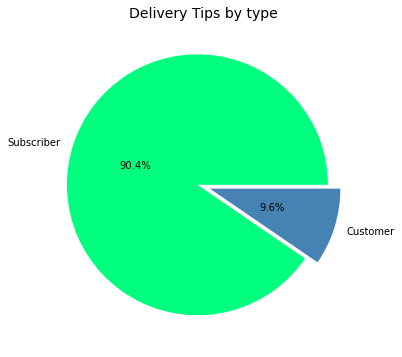

In [38]:
# Pie chart for User Type illustration
pie, ax = plt.subplots(figsize=[10,6])
colors2 = ['springgreen', 'steelblue']
labels = df2.user_type.value_counts().keys()
plt.pie(x=df2.user_type.value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5, colors = colors2)
plt.title("Delivery Tips by type", fontsize=14);
df['user_type'].value_counts()

##### Pie chart for User Type distribution

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was one unusal points for the duration (sec), which in some cases 23.5h. For the histogram I set the max range to 60*60 sec = 60 min.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was one unusal distribution for the member birth year, which in some cases was dated before 1900. Since 95% of the members are between 17 and 57 years, I removed users older than 60, & I created new columns and changed some data type like date.

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

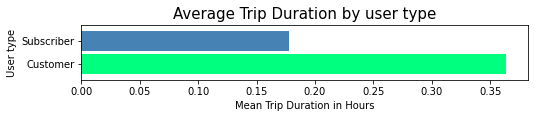

In [39]:
# Average Trip Duration in Hours by user type
axis = df2.groupby('user_type')['duration_hour'].mean().plot(kind='barh', color=colors2, figsize=(8,1),width = .85)
axis.set_title('Average Trip Duration by user type', fontsize=15, y=1.01)
axis.set_ylabel('User type')
axis.set_xlabel('Mean Trip Duration in Hours');

##### it shows that customers average Bikes tripes duration is hgier than subscribers

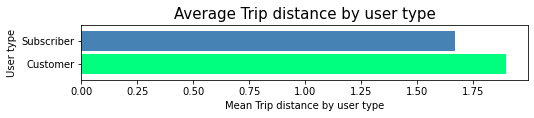

In [40]:
# Average Trip distance by user type
axis = df2.groupby('user_type')['dist_km'].mean().plot(kind='barh', color=colors2, figsize=(8,1),width = .85)
axis.set_title('Average Trip distance by user type', fontsize=15, y=1.01)
axis.set_ylabel('User type')
axis.set_xlabel('Mean Trip distance by user type');

##### it shows that customers average Bikes tripes distance is hgier than subscribers

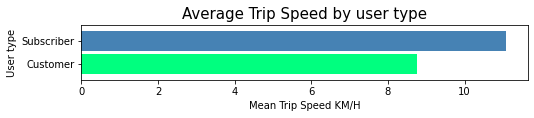

In [41]:
# Average Trip Speed by user type
axis = df2.groupby('user_type')['speed_kmh'].mean().plot(kind='barh', color=colors2, figsize=(8,1),width = .85)
axis.set_title('Average Trip Speed by user type', fontsize=15, y=1.01)
axis.set_ylabel('User type')
axis.set_xlabel('Mean Trip Speed KM/H');

##### it shows that  subscribers average Tripes speed is hgier than customers

No     154722
Yes     16700
Name: bike_share_for_all_trip, dtype: int64

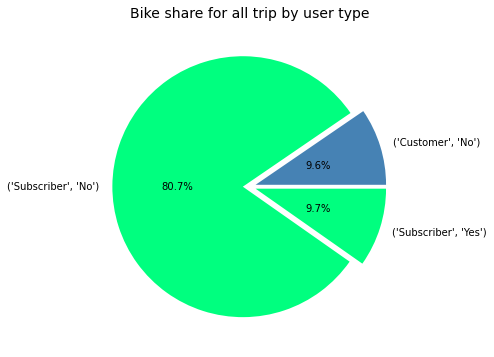

In [42]:
# bike share for all trip by user type
pie, ax = plt.subplots(figsize=[10,6])
colors3=['steelblue', 'springgreen', 'springgreen']
labels = df2.groupby(['user_type','bike_share_for_all_trip']).size().keys()
plt.pie(x=df2.groupby(['user_type','bike_share_for_all_trip']).size(), autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5, colors = colors3)
plt.title('Bike share for all trip by user type', fontsize=14);
df['bike_share_for_all_trip'].value_counts()

##### it shows that  "bike share for all trip" is just 9.6% of all users 

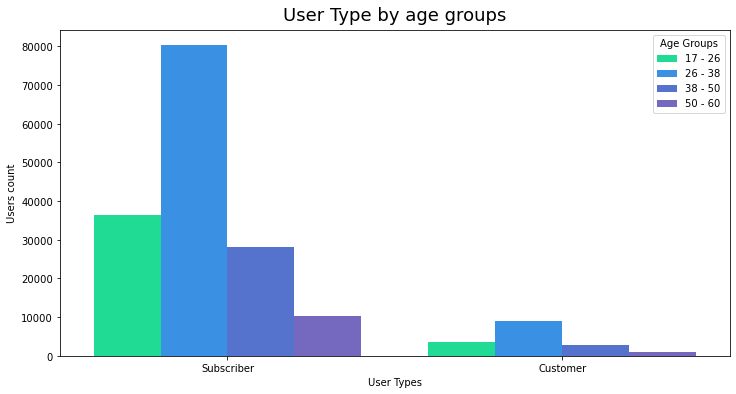

In [43]:
# User type distribution by age groups
plt.figure(figsize=(12,6))
palette = {'17 - 26': 'mediumspringgreen', '26 - 38': 'dodgerblue', '38 - 50': 'royalblue', '50 - 60': 'slateblue'}
axis = sb.countplot(x='user_type', hue='age_groups', palette=palette, data=df2[df2['age_groups'].isin(['17 - 26', '26 - 38', '38 - 50', '50 - 60'])].sort_values(by=['start_time_weekday', 'age_groups']))
plt.title('User Type by age groups', fontsize=18, y=1.01)
plt.xlabel('User Types')
plt.ylabel('Users count')
leg = axis.legend()
leg.set_title('Age Groups',prop={'size':10})
axis = plt.gca()

##### it shows how users types are distributed by Users age groups

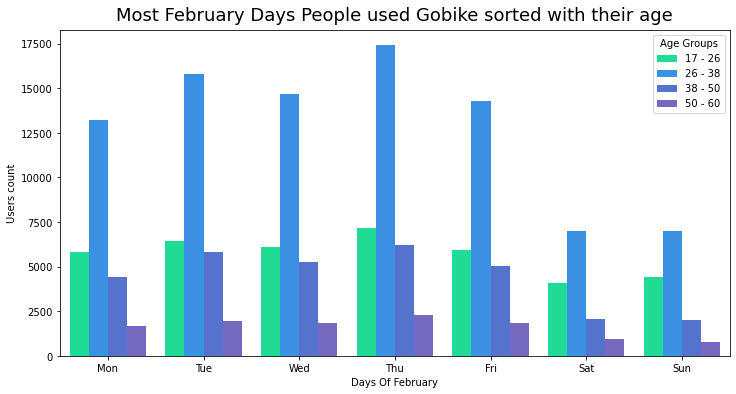

In [44]:
# Users age groups distributed by Weekdays 
plt.figure(figsize=(12,6))
palette = {'17 - 26': 'mediumspringgreen', '26 - 38': 'dodgerblue', '38 - 50': 'royalblue', '50 - 60': 'slateblue'}
axis = sb.countplot(x='start_time_weekday', hue='age_groups', palette=palette, data=df2[df2['age_groups'].isin(['17 - 26', '26 - 38', '38 - 50', '50 - 60'])].sort_values(by=['age_groups']),order=weekdays)
plt.title('Most February Days People used Gobike sorted with their age', fontsize=18, y=1.01)
plt.xlabel('Days Of February')
plt.ylabel('Users count')
leg = axis.legend()
leg.set_title('Age Groups',prop={'size':10})
axis = plt.gca()

##### it dosen't show any favorable days for age groups

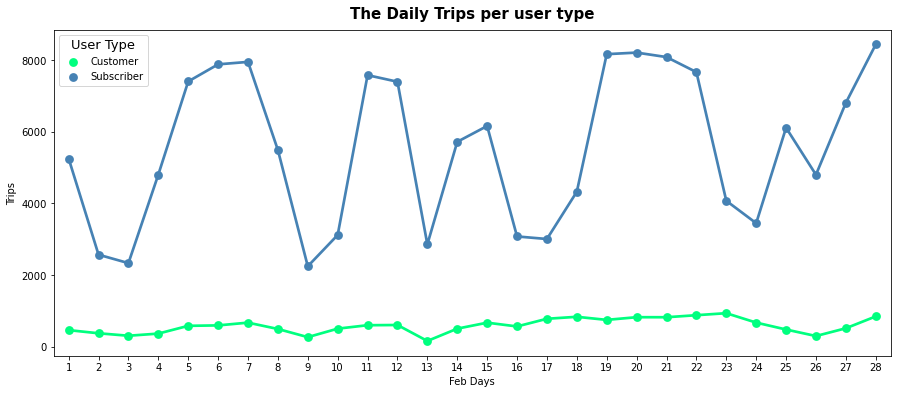

In [45]:
# Daily Bike rides for February by user type
febdays_per_user_count = df2.groupby(["start_time_day", "user_type"]).size().reset_index()
plt.figure(figsize=(15,6))
palette2 = {'Subscriber': 'steelblue', 'Customer': 'springgreen'}
axis = sb.pointplot(x='start_time_day', y=0 , hue='user_type', palette=palette2, scale=1, data = febdays_per_user_count)
plt.title('The Daily Trips per user type', fontsize=15, y=1.015, fontweight='bold')
plt.xlabel('Feb Days')
plt.ylabel('Trips')
leg = axis.legend()
leg.set_title('User Type',prop={'size':13})
axis = plt.gca();

##### it shows that  how weekend has less bike rides for Subscribers and how Customers don't have big changes

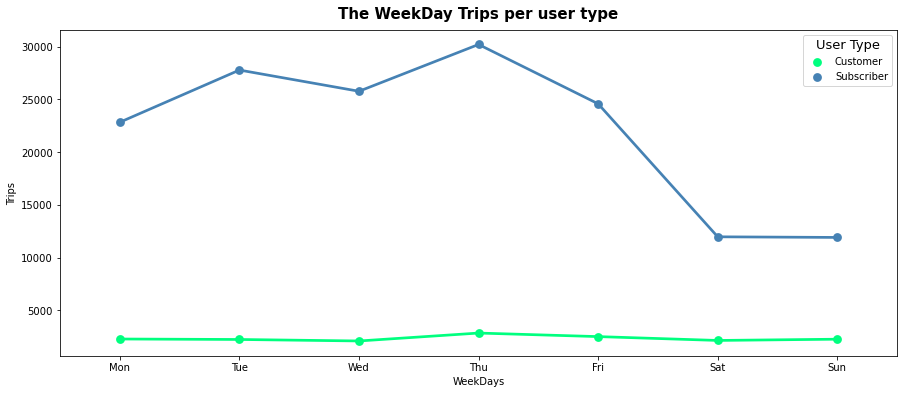

In [46]:
# weekdays bike rides for february by user type
weekday_per_user_count = df2.groupby(["start_time_weekday", "user_type"]).size().reset_index()
plt.figure(figsize=(15,6))
axis = sb.pointplot(x='start_time_weekday', y=0 , hue='user_type', palette=palette2, scale=1, data = weekday_per_user_count, order=weekdays)
plt.title('The WeekDay Trips per user type', fontsize=15, y=1.015, fontweight='bold')
plt.xlabel('WeekDays')
plt.ylabel('Trips')
leg = axis.legend()
leg.set_title('User Type',prop={'size':13})
axis = plt.gca();

##### more visualization to show weekend impact for subscribers rides

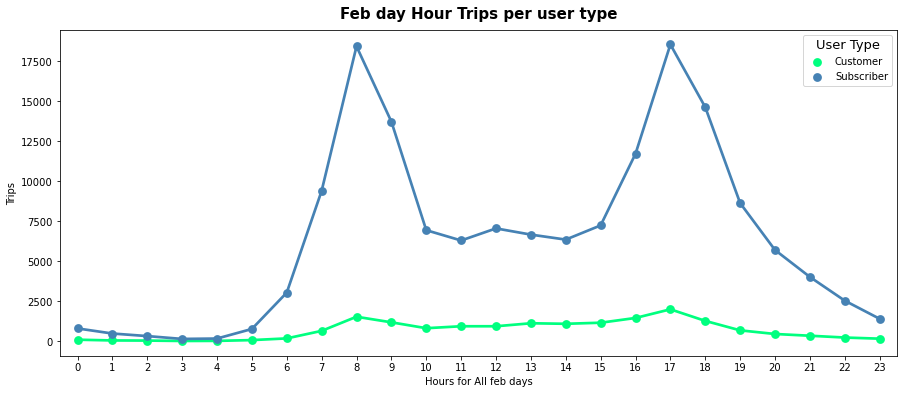

In [47]:
# Hourly bike rides for february by user type
hours_per_user_count = df2.groupby(["start_time_hour", "user_type"]).size().reset_index()
plt.figure(figsize=(15,6))
axis = sb.pointplot(x='start_time_hour', y=0 , hue='user_type', palette=palette2, scale=1, data = hours_per_user_count)
plt.title('Feb day Hour Trips per user type', fontsize=15, y=1.015, fontweight='bold')
plt.xlabel('Hours for All feb days')
plt.ylabel('Trips')
leg = axis.legend()
leg.set_title('User Type',prop={'size':13})
axis = plt.gca();

##### Rush hours from 7am to 9am & 4pm to 6pm is likely going & returning from school or work

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Based on user type to the analysis the diffrence between customers and subscribers usage behaviours,Bike Rides more often during weekday than weekend, in weekdays bikes rides more at hours (8-9am and 5-6pm) because of work or school. subscribers ride bike faster and use Gobike for Short distances and sure less average time per trip, on the other hand Customers are slow and go for long distances sure more average time per trip.
"bike share for all trip" just 9.6% is too smale.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customers trips are usually longer & Slower than for subscribers, subscribers trips are usually shorter & faster than for Customers. and we observe that weekends bike rides for subscribers are at its lowest ratio but for Customers it's just normal.

<a id='multivariate'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

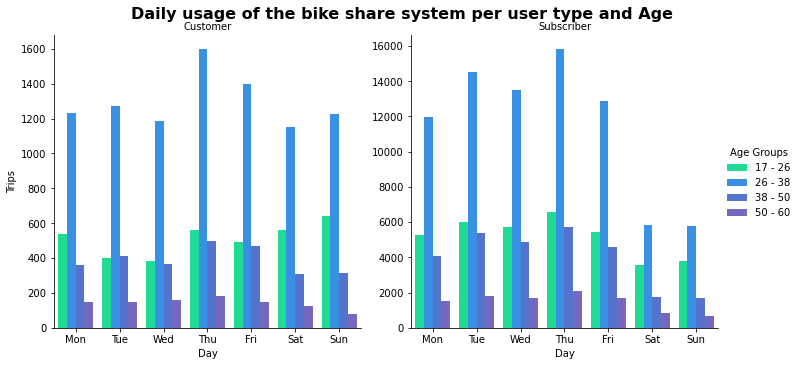

In [48]:
# Daily usege of the bike sharing system per user type and gender
age_order = ['17 - 26', '26 - 38', '38 - 50', '50 - 60']
g = sb.catplot(data=df2, x='start_time_weekday', col="user_type", hue="age_groups",hue_order=age_order, kind='count', sharey = False, palette=palette, order=weekdays)
g.set_axis_labels("Day", "Trips")
g._legend.set_title('Age Groups')
g.set_titles("{col_name}")
g.fig.suptitle('Daily usage of the bike share system per user type and Age', y=1.01, fontsize=16, fontweight='bold');

##### it dosen't show any favorable days for age groups or User types

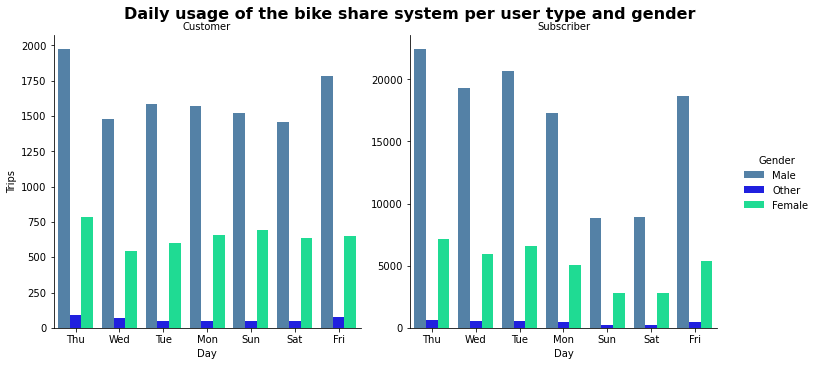

In [49]:
# Daily usege of the bike sharing system per user type and gender
g = sb.catplot(data=df2, x='start_time_weekday', col="user_type", hue="member_gender", kind='count',palette= {'Female': 'mediumspringgreen', 'Male': 'steelblue', 'Other': 'blue'}, sharey = False)
g.set_axis_labels("Day", "Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Daily usage of the bike share system per user type and gender', y=1.01, fontsize=16, fontweight='bold');

##### it dosen't show any favorable days for Genders or User types

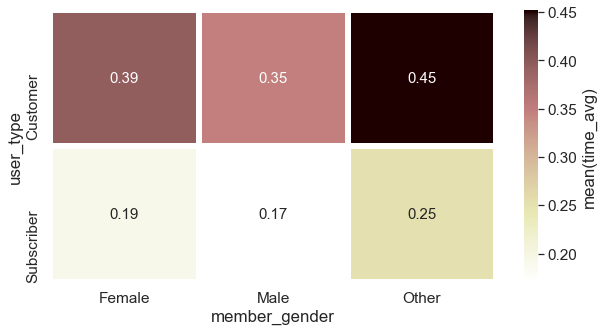

In [50]:
#heatmaping Duration "hour" by genders and user types
sb.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(10,5))
age_user_dist = df2.groupby(['member_gender', 'user_type']).mean()['duration_hour']
age_user_dist = age_user_dist.reset_index(name = 'time_avg')
age_user_dist = age_user_dist.pivot(index = 'user_type', columns = 'member_gender', values = 'time_avg')
sb.heatmap(age_user_dist, annot = True, fmt = '.2f', cmap="pink_r", ax=ax, linewidths=5, cbar_kws = {'label' : 'mean(time_avg)'}, annot_kws={"fontsize":15});

##### Females have more time average than males but others have much more

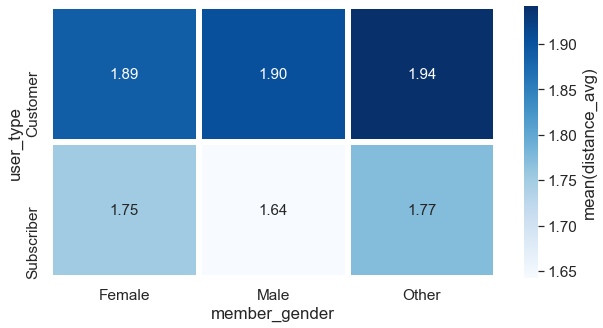

In [51]:
#heatmaping Distance "Km" by genders and user types
sb.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(10,5))
gender_user_dist = df2.groupby(['member_gender', 'user_type']).mean()['dist_km']
gender_user_dist = gender_user_dist.reset_index(name = 'distance_avg')
gender_user_dist = gender_user_dist.pivot(index = 'user_type', columns = 'member_gender', values = 'distance_avg')
sb.heatmap(gender_user_dist, annot = True, fmt = '.2f', cmap="Blues", ax=ax, linewidths=5, cbar_kws = {'label' : 'mean(distance_avg)'}, annot_kws={"fontsize":15});

##### Subscriber Females have long trips distance than Subscriber Males

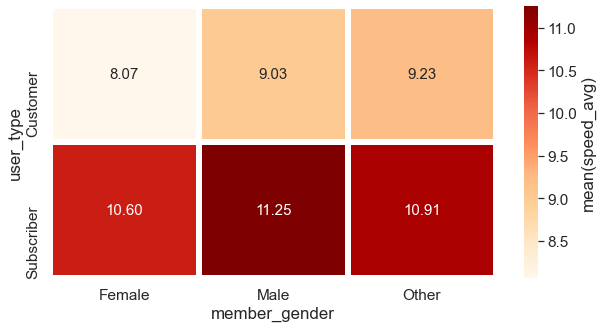

In [52]:
#heatmaping Speed "Km/h" by genders and user types
sb.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(10,5))
gender_user_speed = df2.groupby(['member_gender', 'user_type']).mean()['speed_kmh']
gender_user_speed = gender_user_speed.reset_index(name = 'speed_avg')
gender_user_speed = gender_user_speed.pivot(index = 'user_type', columns = 'member_gender', values = 'speed_avg')
sb.heatmap(gender_user_speed, annot = True, fmt = '.2f',cmap="OrRd", ax=ax, linewidths=5, cbar_kws = {'label' : 'mean(speed_avg)', }, annot_kws={"fontsize":15});

##### Suscriber males have the highest speed average

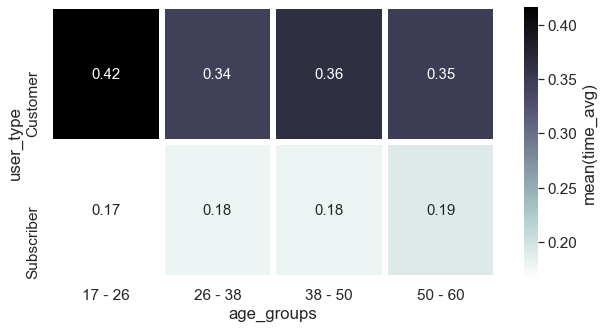

In [53]:
#heatmaping Duration "hour" by age groups and user types
sb.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(10,5))
age_user_dist = df2.groupby(['age_groups', 'user_type']).mean()['duration_hour']
age_user_dist = age_user_dist.reset_index(name = 'time_avg')
age_user_dist = age_user_dist.pivot(index = 'user_type', columns = 'age_groups', values = 'time_avg')
sb.heatmap(age_user_dist, annot = True, fmt = '.2f', cmap="bone_r", ax=ax, linewidths=5, cbar_kws = {'label' : 'mean(time_avg)'}, annot_kws={"fontsize":15});

##### Subscribers has least time averags by all age groups

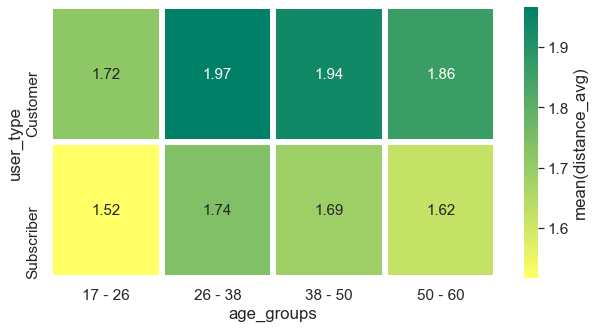

In [54]:
#heatmaping Distance "Km" by age groups and user types
sb.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(10,5))
age_user_dist = df2.groupby(['age_groups', 'user_type']).mean()['dist_km']
age_user_dist = age_user_dist.reset_index(name = 'distance_avg')
age_user_dist = age_user_dist.pivot(index = 'user_type', columns = 'age_groups', values = 'distance_avg')
sb.heatmap(age_user_dist, annot = True, fmt = '.2f', cmap="summer_r", ax=ax, linewidths=5, cbar_kws = {'label' : 'mean(distance_avg)'}, annot_kws={"fontsize":15});

##### age group 26-38 have achieved highest distance in both user types

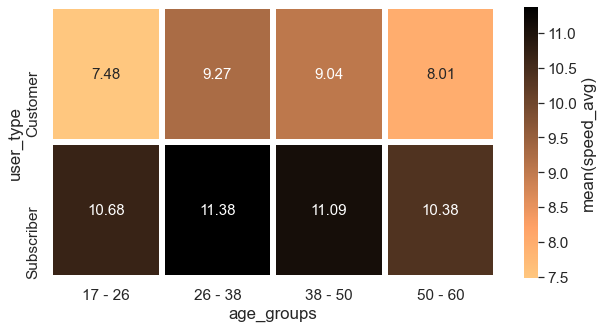

In [55]:
# #heatmaping Speed "Km/h" by age groups and user types
sb.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(10,5))
age_user_speed = df2.groupby(['age_groups', 'user_type']).mean()['speed_kmh']
age_user_speed = age_user_speed.reset_index(name = 'speed_avg')
age_user_speed = age_user_speed.pivot(index = 'user_type', columns = 'age_groups', values = 'speed_avg')
sb.heatmap(age_user_speed, annot = True, fmt = '.2f',cmap="copper_r", ax=ax, linewidths=5, cbar_kws = {'label' : 'mean(speed_avg)', }, annot_kws={"fontsize":15});

##### age group 26-38 have achieved highest Speed in both user types

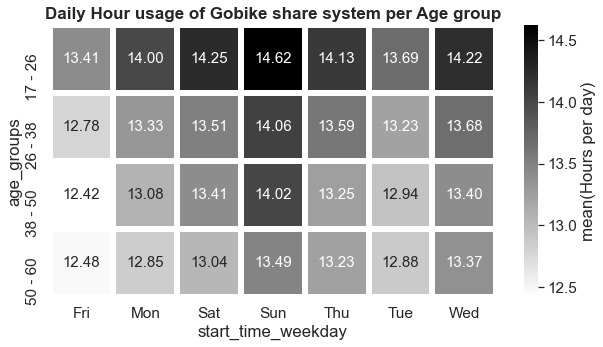

In [56]:
# #heatmaping weekdays hour averages by age groups and user types
sb.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(10,5))
age_user_speed = df2.groupby(['start_time_weekday', 'age_groups']).mean()['start_time_hour']
age_user_speed = age_user_speed.reset_index(name = 'Hours')
age_user_speed = age_user_speed.pivot(index = 'age_groups', columns = 'start_time_weekday', values = 'Hours')
sb.heatmap(age_user_speed, annot = True, fmt = '.2f',cmap="binary", ax=ax, linewidths=5, cbar_kws = {'label' : 'mean(Hours per day)', }, annot_kws={"fontsize":15})
ax.set_title('Daily Hour usage of Gobike share system per Age group', y=1.01, fontsize=17, fontweight='bold');

##### Fridays have least work dauration for all age groups

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Plotting a heatmap with including a third variable, the insight become more like complete as explained above, speed, distance & dauration for user types and age groups have strengthened the visualiztions.

### Were there any interesting or surprising interactions between features?

> As expectated nothing seems out of normal for a Gobike Data, the data reveals that adults in the average working age range "26-38" are the primary user base for the system, and they use the bikes on their daily commutes. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!